In [1]:
'''

Assignment 1: Heart Disease Prediction
Dataset: Heart Disease UCI
Link: https://raw.githubusercontent.com/anshulc55/datasets/main/heart.csv
Task:
 Predict whether a patient has heart disease (0/1).
 Handle missing values using mean/median.
 Apply LabelEncoder to categorical columns (cp, thal, slope).
 Apply StandardScaler to all numeric features.
 Train logistic regression and evaluate using Accuracy, Recall & ROC-AUC

'''

'\n\nAssignment 1: Heart Disease Prediction\nDataset: Heart Disease UCI\nLink: https://raw.githubusercontent.com/anshulc55/datasets/main/heart.csv\nTask:\n\uf0b7 Predict whether a patient has heart disease (0/1).\n\uf0b7 Handle missing values using mean/median.\n\uf0b7 Apply LabelEncoder to categorical columns (cp, thal, slope).\n\uf0b7 Apply StandardScaler to all numeric features.\n\uf0b7 Train logistic regression and evaluate using Accuracy, Recall & ROC-AUC\n\n'

In [2]:
import pandas as pd

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
df = pd.read_csv('HeartDiseaseTrain-Test.csv')   ## upload the dataset
df  ## print the dataset

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,Male,Typical angina,125,212,Lower than 120 mg/ml,ST-T wave abnormality,168,No,1.0,Downsloping,Two,Reversable Defect,0
1,53,Male,Typical angina,140,203,Greater than 120 mg/ml,Normal,155,Yes,3.1,Upsloping,Zero,Reversable Defect,0
2,70,Male,Typical angina,145,174,Lower than 120 mg/ml,ST-T wave abnormality,125,Yes,2.6,Upsloping,Zero,Reversable Defect,0
3,61,Male,Typical angina,148,203,Lower than 120 mg/ml,ST-T wave abnormality,161,No,0.0,Downsloping,One,Reversable Defect,0
4,62,Female,Typical angina,138,294,Greater than 120 mg/ml,ST-T wave abnormality,106,No,1.9,Flat,Three,Fixed Defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,Male,Atypical angina,140,221,Lower than 120 mg/ml,ST-T wave abnormality,164,Yes,0.0,Downsloping,Zero,Fixed Defect,1
1021,60,Male,Typical angina,125,258,Lower than 120 mg/ml,Normal,141,Yes,2.8,Flat,One,Reversable Defect,0
1022,47,Male,Typical angina,110,275,Lower than 120 mg/ml,Normal,118,Yes,1.0,Flat,One,Fixed Defect,0
1023,50,Female,Typical angina,110,254,Lower than 120 mg/ml,Normal,159,No,0.0,Downsloping,Zero,Fixed Defect,1


In [44]:
(df['target']==0).mean()

0.4868292682926829

In [45]:
(df['target']==1).mean()

0.5131707317073171

In [4]:
df.isnull().sum()   ## check null value

age                              0
sex                              0
chest_pain_type                  0
resting_blood_pressure           0
cholestoral                      0
fasting_blood_sugar              0
rest_ecg                         0
Max_heart_rate                   0
exercise_induced_angina          0
oldpeak                          0
slope                            0
vessels_colored_by_flourosopy    0
thalassemia                      0
target                           0
dtype: int64

In [5]:
df['vessels_colored_by_flourosopy'].unique()  ## unique value of vessels_colored_by_flourosopy column 

array(['Two', 'Zero', 'One', 'Three', 'Four'], dtype=object)

In [6]:
df1 = df.drop(['target'],axis=1)

In [7]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder

In [8]:
le_sex = LabelEncoder()  ## create object for sex column 
le_cpt = LabelEncoder()  ## create object for chest_pain_type column
le_fbs = LabelEncoder()  ## create object for fasting_blood_sugar column
le_re = LabelEncoder()   ## create object for rest_ecg column
le_eia = LabelEncoder()  ## create object for exercise_induced_angina column
le_s = LabelEncoder()   ## create object for slope column 
le_t = LabelEncoder()  ## create object for thalassemia column

In [9]:
## transform categorical to numerical for labelling data using label encoder
df['sex'] = le_sex.fit_transform(df['sex'])  
df['chest_pain_type'] = le_cpt.fit_transform(df['chest_pain_type'])
df['fasting_blood_sugar'] = le_fbs.fit_transform(df['fasting_blood_sugar'])
df['rest_ecg'] = le_re.fit_transform(df['rest_ecg'])
df['exercise_induced_angina'] = le_eia.fit_transform(df['exercise_induced_angina'])
df['slope'] = le_s.fit_transform(df['slope'])
df['thalassemia'] = le_t.fit_transform(df['thalassemia'])

In [10]:
df.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
0,52,1,3,125,212,1,2,168,0,1.0,0,Two,3,0
1,53,1,3,140,203,0,1,155,1,3.1,2,Zero,3,0
2,70,1,3,145,174,1,2,125,1,2.6,2,Zero,3,0
3,61,1,3,148,203,1,2,161,0,0.0,0,One,3,0
4,62,0,3,138,294,0,2,106,0,1.9,1,Three,0,0


In [11]:
oe = OrdinalEncoder(categories=[['Zero','One','Two','Three','Four']])  ## create object for vessels_colored_by_flourosopy column 

In [12]:
x1 = df['vessels_colored_by_flourosopy'].values  

In [13]:
oe.fit(x1.reshape(-1,1))  ## after change row vector to column vector , fit this column 

,categories,"[['Zero', 'One', ...]]"
,dtype,<class 'numpy.float64'>
,handle_unknown,'error'
,unknown_value,None
,encoded_missing_value,nan
,min_frequency,None
,max_categories,None


In [14]:
df['vessels_colored_by_flourosopy'] = oe.transform(x1.reshape(-1,1))  ## transform categorical to numerical into orderwise in this column

In [15]:
df.sample(3)

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia,target
628,69,0,0,140,239,1,2,151,0,1.8,0,2.0,0,1
717,56,1,2,130,256,0,1,142,1,0.6,1,1.0,2,0
5,58,0,3,100,248,1,1,122,0,1.0,1,0.0,0,1


In [16]:
df['oldpeak'].unique()  ## check unique value of this column 

array([1. , 3.1, 2.6, 0. , 1.9, 4.4, 0.8, 3.2, 1.6, 3. , 0.7, 4.2, 1.5,
       2.2, 1.1, 0.3, 0.4, 0.6, 3.4, 2.8, 1.2, 2.9, 3.6, 1.4, 0.2, 2. ,
       5.6, 0.9, 1.8, 6.2, 4. , 2.5, 0.5, 0.1, 2.1, 2.4, 3.8, 2.3, 1.3,
       3.5])

In [17]:
cols = ['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak']  ## all columns are continuous 
df[cols].corr()  ## check correlation of this dataset

,age,resting_blood_pressure,cholestoral,Max_heart_rate,oldpeak
age,1.000000,0.271121,0.219823,-0.390227,0.208137
resting_blood_pressure,0.271121,1.000000,0.127977,-0.039264,0.187434
cholestoral,0.219823,0.127977,1.000000,-0.021772,0.064880
Max_heart_rate,-0.390227,-0.039264,-0.021772,1.000000,-0.349796
oldpeak,0.208137,0.187434,0.064880,-0.349796,1.000000


In [18]:
import seaborn as sns

C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed

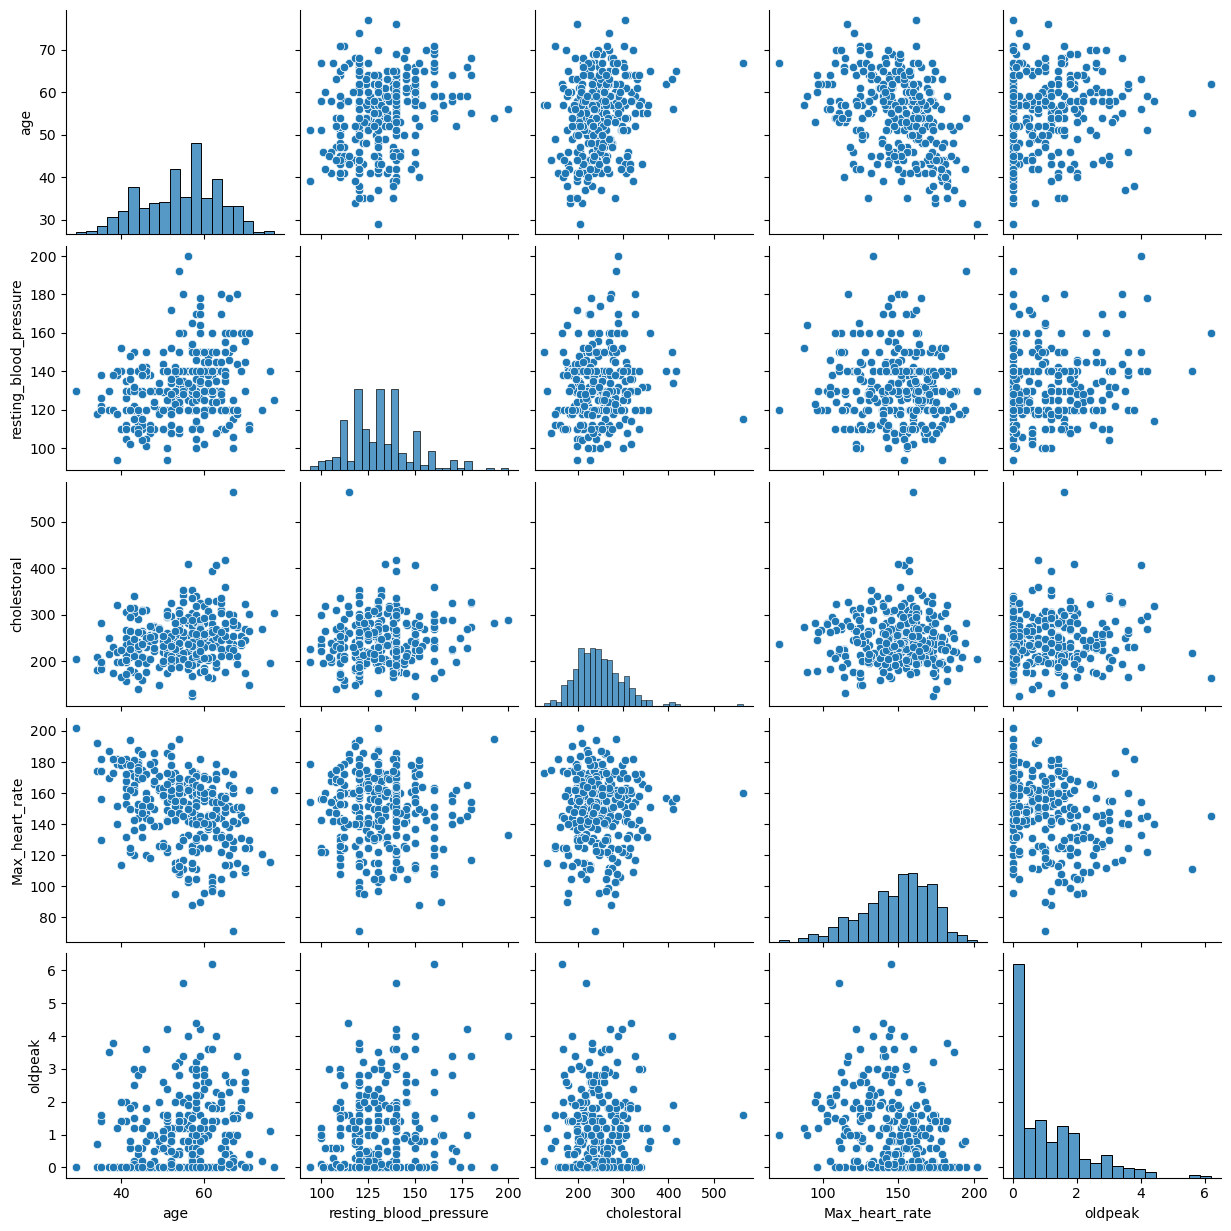

In [19]:
sns.pairplot(df[cols])

In [20]:
x = df.drop(['target'],axis=1)  ## drop off the target column for train test split

In [21]:
y = df['target']  ## fetch the only target column for train test split

In [22]:
from sklearn.model_selection import train_test_split  

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)  ## spilt the data with 20% dta for testing and 80% data for training

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()  ## create object of standard scaler

In [26]:
col1 = ['age','resting_blood_pressure','cholestoral','Max_heart_rate','oldpeak']

In [27]:
x_train[col1] = scaler.fit_transform(x_train[col1])  ## calculate mean and variance from x_train and transform training and testing data
x_test[col1] = scaler.transform(x_test[col1])

In [28]:
x_train.sample(5)  ## print x_train column after scaling

,age,sex,chest_pain_type,resting_blood_pressure,cholestoral,fasting_blood_sugar,rest_ecg,Max_heart_rate,exercise_induced_angina,oldpeak,slope,vessels_colored_by_flourosopy,thalassemia
503,-1.022384,0,1,-0.116638,-0.220112,1,1,1.116719,0,-0.414205,1,0.0,0
1009,-1.566065,1,3,1.145604,-0.436340,1,2,1.374702,0,-0.916025,0,0.0,3
65,0.499921,1,0,2.178347,0.841373,1,1,0.428765,0,-0.748752,1,0.0,3
370,-1.239857,0,3,-0.001889,1.883200,0,1,-0.560169,1,1.593074,1,0.0,3
316,1.043601,0,2,0.457108,1.332801,1,2,-0.689160,0,-0.748752,0,0.0,3


In [29]:
from sklearn.linear_model import LogisticRegression

In [30]:
lr = LogisticRegression()  ## create object of logistic regression

In [31]:
lr.fit(x_train,y_train)  ## fitting logistic regression on x_train and y_train

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [32]:
y_pred = lr.predict(x_test)  ## predict from x_test

In [33]:
from sklearn.metrics import accuracy_score,mean_absolute_error,confusion_matrix,classification_report

In [34]:
accuracy_score(y_test,y_pred)  ## accuracy score of the model

0.8390243902439024

In [35]:
mean_absolute_error(y_test,y_pred)  ## mean absolute error of the model

0.16097560975609757

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

[[73 21]
 [12 99]]


Text(50.722222222222214, 0.5, 'Actual Values')

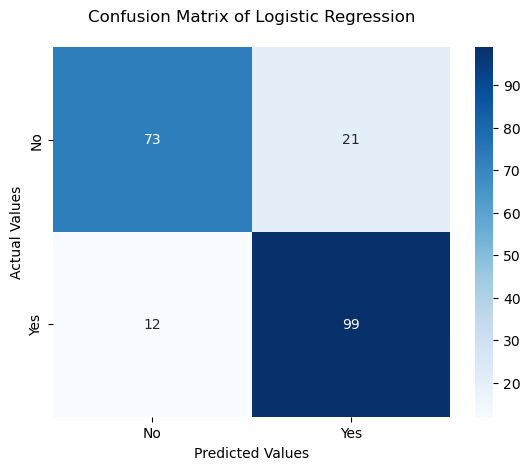

In [41]:
cm  = confusion_matrix(y_test,y_pred)
print(cm)  ## print confusion matrix
sns.heatmap(cm,annot=True,cmap='Blues',xticklabels=['No','Yes'],yticklabels=['No','Yes']) ## graphically show confusion matrix
plt.title('Confusion Matrix of Logistic Regression\n')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [38]:
print(classification_report(y_test,y_pred))  ## print precision , recall , f1-score,accuracy , macro average , weighted average 

              precision    recall  f1-score   support

           0       0.86      0.78      0.82        94
           1       0.82      0.89      0.86       111

    accuracy                           0.84       205
   macro avg       0.84      0.83      0.84       205
weighted avg       0.84      0.84      0.84       205



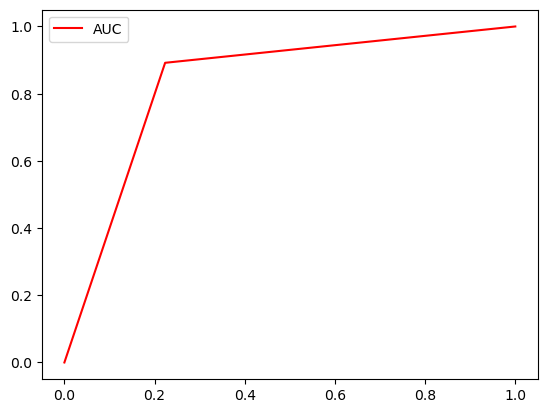

In [39]:
#print AUC ROC curve
from matplotlib import pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
plt.figure()
fpr,tpr,threshold=roc_curve(y_test,y_pred)
roc_auc_score(y_test,y_pred)
plt.plot(fpr,tpr,color='red',label='AUC')
plt.legend(loc=2)
plt.show()

In [97]:
import numpy as np

In [109]:
## prediction for new user input

## take input from user

b = []
for i in range(0,13):
    if df1.columns[i] in df1.select_dtypes(include='object').columns :
        n = input(f'Enter {df1.columns[i]} : ').strip()
    elif df1.columns[i] in df1.select_dtypes(include='int64').columns:
        n = int(input(f'Enter {df1.columns[i]} : ').strip())
    elif df1.columns[i] in df1.select_dtypes(include='float64').columns:
        n = float(input(f'Enter {df1.columns[i]} : ').strip())
    b.append(n)

print(b)  ## show user input

new = np.array(b, dtype=object).reshape(1, -1)  ## convert to array and change row vector to column vector

print(new) ## show new reshape user input

## convert categorical to numerical for labeling data useing label encoder
new[0,1] = le_sex.transform([new[0,1]])[0]
new[0,2] = le_cpt.transform([new[0,2]])[0]
new[0,5] = le_fbs.transform([new[0,5]])[0]
new[0,6] = le_re.transform([new[0,6]])[0]
new[0,8] = le_eia.transform([new[0,8]])[0]
new[0,10] = le_s.transform([new[0,10]])[0]
new[0,11] = oe.transform([[new[0,11]]])[0][0] ## use ordinal encoder for order data
new[0,12] = le_t.transform([new[0,12]])[0]

## scaling continuous column data using scaling

new[:, [0,3,4,7,9]] = scaler.transform(new[:, [0,3,4,7,9]])


## print(new)  ## after scaling show the data


prediction = lr.predict(new) 
print(prediction)  ## show prediction the output

Enter age : 62
Enter sex : Male
Enter chest_pain_type : Typical angina
Enter resting_blood_pressure : 120
Enter cholestoral : 267
Enter fasting_blood_sugar : Lower than 120 mg/ml
Enter rest_ecg : ST-T wave abnormality
Enter Max_heart_rate : 99
Enter exercise_induced_angina : Yes
Enter oldpeak : 1.8
Enter slope : Flat
Enter vessels_colored_by_flourosopy : Two
Enter thalassemia : Reversable Defect
[62, 'Male', 'Typical angina', 120, 267, 'Lower than 120 mg/ml', 'ST-T wave abnormality', 99, 'Yes', 1.8, 'Flat', 'Two', 'Reversable Defect']
[[62 'Male' 'Typical angina' 120 267 'Lower than 120 mg/ml'
  'ST-T wave abnormality' 99 'Yes' 1.8 'Flat' 'Two' 'Reversable Defect']]
Male
[[0.8420895032258463 1 3 -0.6711377858889225 0.40227668292951424 1 2
  -2.133870554731113 1 0.6317633863817355 1 2.0 3]]
[0]


C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\Saikat Maiti\Downloads\Anaconda\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
